In [1371]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv


# **Term Deposit Subscribership Prediction**

In [1372]:
#First step is to import my dataset into the notebook as a dataframe and examine first 5 rows

bank_data = pd.read_csv("/kaggle/input/dataset-for-bta-419-2023/BTA_419_2023_Data.csv")
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **1. Describe the dataset:**
The dataset is comprised of direct marketing campaign data of a Portuguese banking institution. The data was collected using a telemarketing system and was accessed from the UCI Machine Learning Repository. The goal of collecting such data was to determine how successful telemarketing calls were for clients subscribing to long-term bank deposits. The data includes socioeconomic, bank client, and product attributes.

There are 21 total variables:
1. age
2. job: type of job 
3. marital : marital status 
4. education 
5. default: has credit in default? 
6. housing: has housing loan?
7. loan: has personal loan? 
8. contact: contact communication type
9. month: last contact month of year 
10. day_of_week: last contact day of the week
11. duration: last contact duration, in seconds (used for benchmarking purposes only) 
12. campaign: number of contacts performed during this campaign and for this client 
13. pdays: number of daysthat passed after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client 
15. poutcome: outcome of the previous marketing campaign 
16. emp.var.rate: employment variation rate - quarterly indicator
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator
19. euribor3m: euribor 3 month rate - daily indicator 
20. nr.employed: number of employees - quarterly indicator
21. has the client subscribed a term deposit? (outcome variable)

# Exploring The Data

In [1373]:
#Basic information about dataset including datatypes for each variable

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [1374]:
#Describe data - note: only shows numerical data

bank_data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1375]:
#Find any null values

bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The dataset is clean and has no null values

In [1376]:
#Examine datatypes

bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [1377]:
#Show total number of clients and total number of variables 

bank_data.shape

(41188, 21)

In [1378]:
#Find unique for categorical data

print('Job:\n',bank_data['job'].unique())
print('Marital:\n',bank_data['marital'].unique())
print('Education:\n',bank_data['education'].unique())
print('Default:\n',bank_data['default'].unique())
print('Housing:\n',bank_data['housing'].unique())
print('Loan:\n',bank_data['loan'].unique())
print('Contact:\n',bank_data['contact'].unique())
print('Month:\n',bank_data['month'].unique())
print('Day:\n',bank_data['day_of_week'].unique())
print('Poutcome:\n',bank_data['poutcome'].unique())
print('Subscribed:\n',bank_data['y'].unique())

Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Subscribed:
 ['no' 'yes']


In [1379]:
#Grouping the basic.9y/6y/4y outputs to "basic"
bank_data['education']=np.where(bank_data['education'] =='basic.9y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.6y', 'basic', bank_data['education'])
bank_data['education']=np.where(bank_data['education'] =='basic.4y', 'basic', bank_data['education'])

print('Education:\n',bank_data['education'].unique())

Education:
 ['basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']


In [1380]:
#Outcome variable is Y, so I need to see how many clients subscribed versus did not
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [1381]:
#Data Cleaning time! Check for dupes
bank_data.duplicated().sum()

15

In [1382]:
#Drop dupes
bank_data = bank_data.drop_duplicates()

In [1383]:
bank_data.default.value_counts() 

no         32574
unknown     8596
yes            3
Name: default, dtype: int64

In [1384]:
bank_data.job.value_counts() 

admin.           10419
blue-collar       9250
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [1385]:
bank_data.loan.value_counts() 

no         33936
yes         6247
unknown      990
Name: loan, dtype: int64

In [1386]:
bank_data.drop(bank_data[bank_data['loan'] == "unknown"].index, inplace=True)


## **Business Question (Problem Statement):**

The Portuguese Banking Institution needs to focus their marketing efforts on clients who are at
a higher likelihood of purchasing a term deposit. Out of the bank’s existing customers,
which demographics are most likely to sign up for a term deposit?

## **Define the outcome variable and how it is linked with the question and problem identified.**

The outcome variable is the "y" column which is a "yes" or "no" response to whether the client subscribed to a term deposit or not. By determining what types of clients are more likely to sign up for these deposits, the bank can adjust their marketing efforts to the most likely group(s), saving time and money.

## Visualizing The Variables

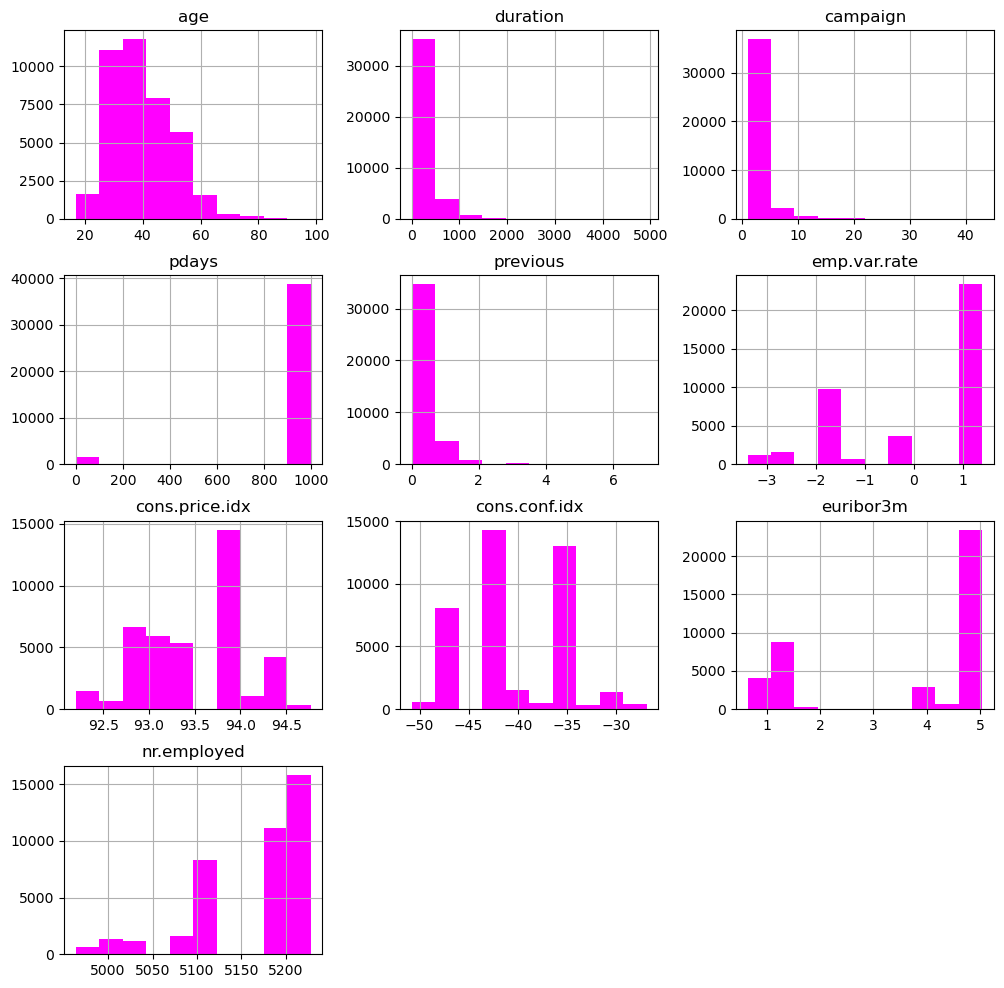

In [1387]:
#Univariate Analysis: Plot histograms of each numeric variable to look for anything that stands out

from matplotlib import pyplot as plt
bank_data.hist(figsize=(12,12), color="magenta")
plt.show()

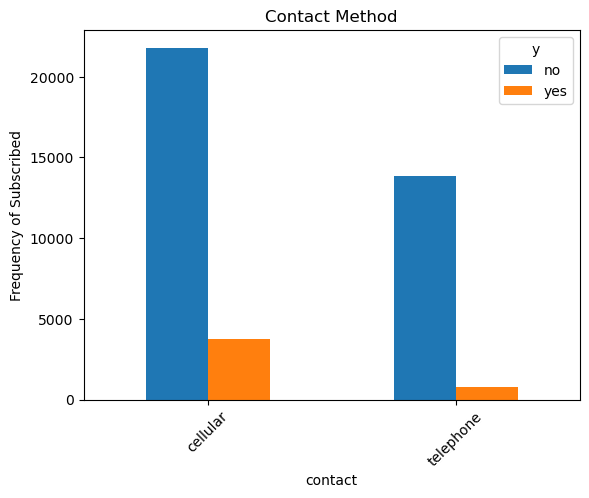

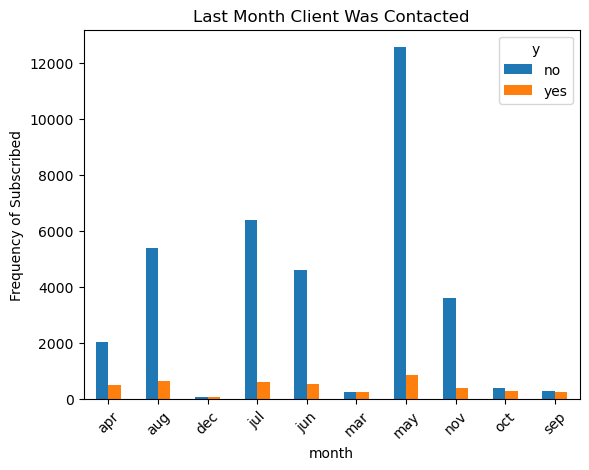

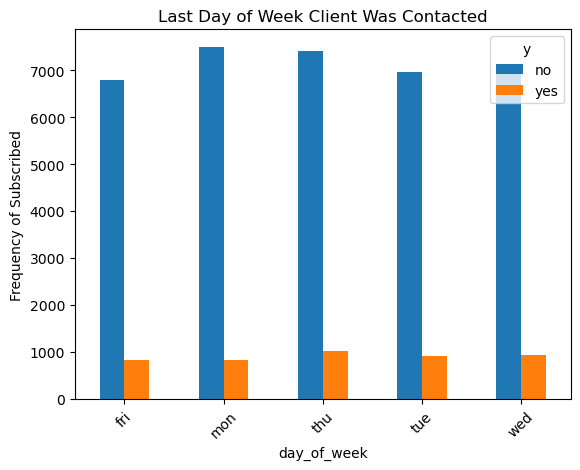

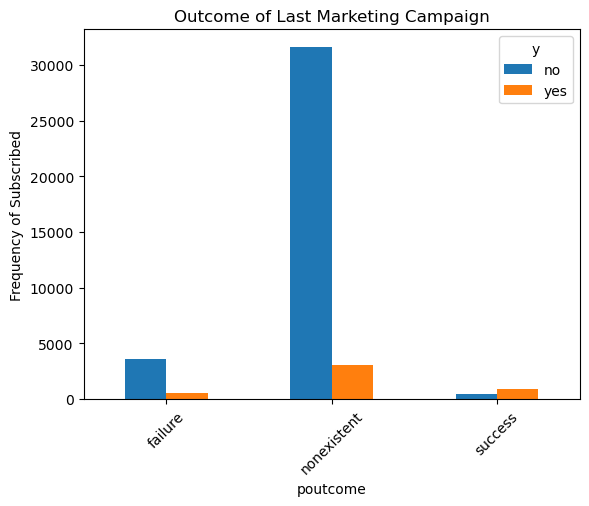

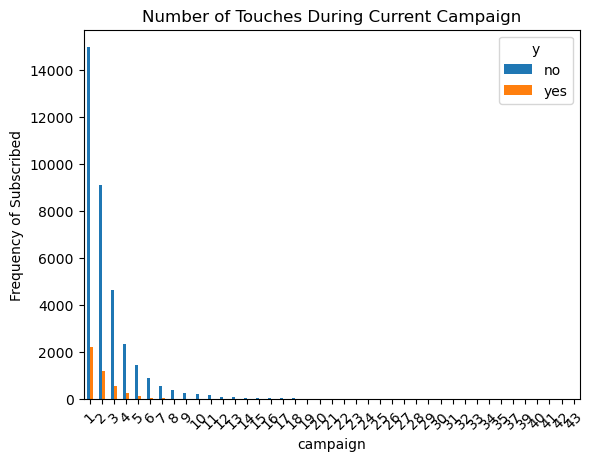

In [1388]:
#MultiVariant Analysis: Plot Categorical Data: Client Telemarketing Contact Information

pd.crosstab(bank_data.contact,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Subscribed')
plt.title("Contact Method")
plt.show()

pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Subscribed')
plt.title("Last Month Client Was Contacted")
plt.show()

pd.crosstab(bank_data.day_of_week,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Subscribed')
plt.title("Last Day of Week Client Was Contacted")
plt.show()

pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Subscribed')
plt.title("Outcome of Last Marketing Campaign")
plt.show()

pd.crosstab(bank_data.campaign,bank_data.y).plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency of Subscribed')
plt.title("Number of Touches During Current Campaign")
plt.show()


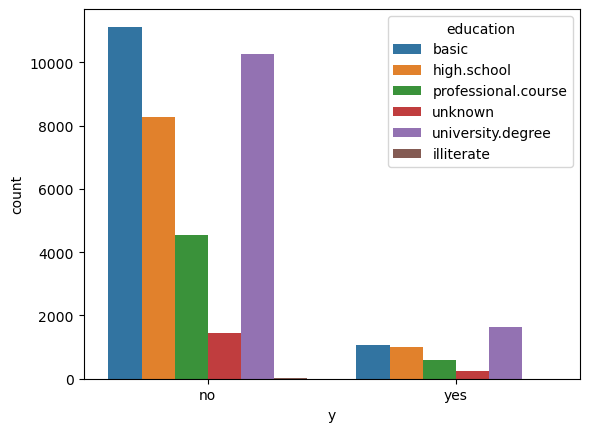

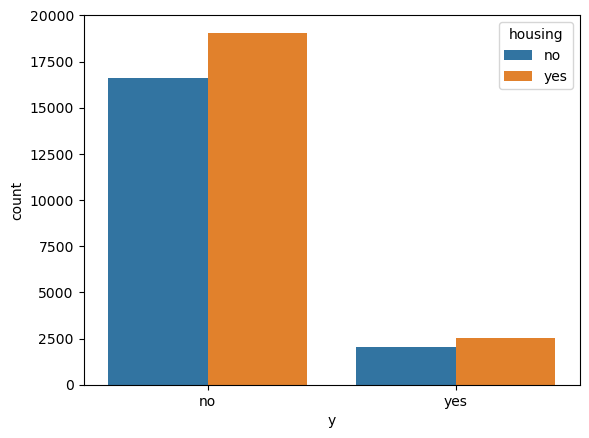

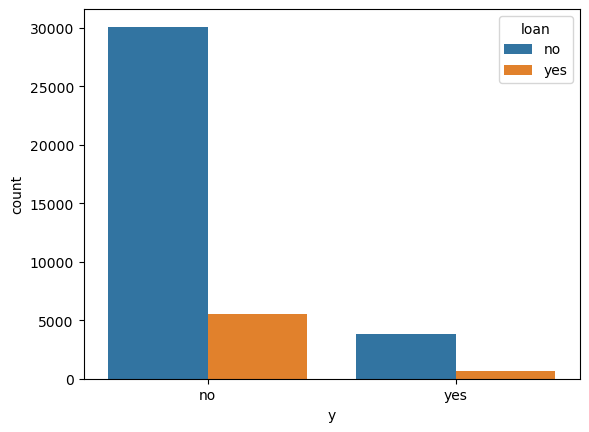

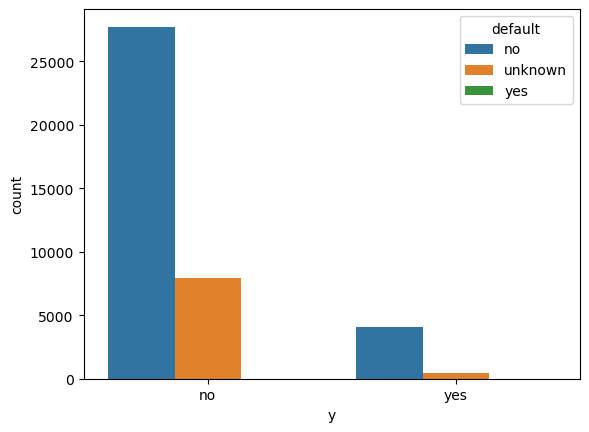

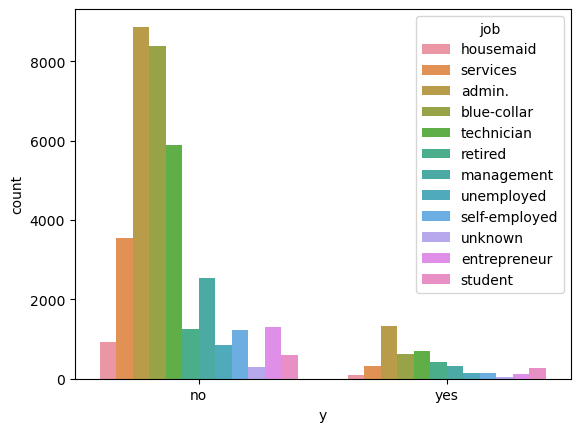

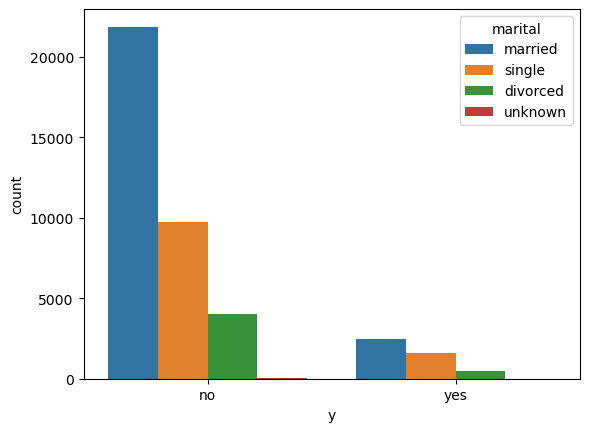

In [1389]:
sns.countplot(x = 'y',hue = 'education',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'housing',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'loan',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'default',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'job',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'marital',data = bank_data)
plt.show()


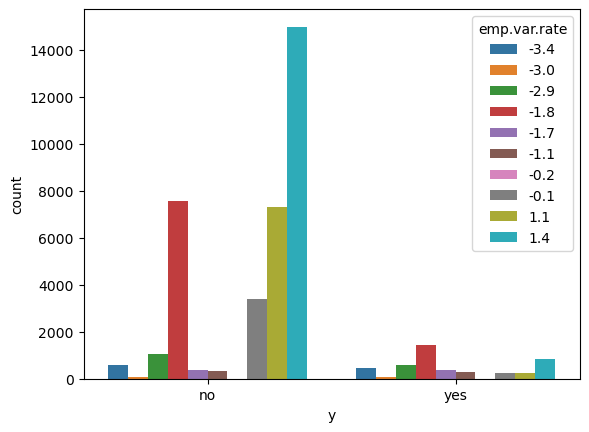

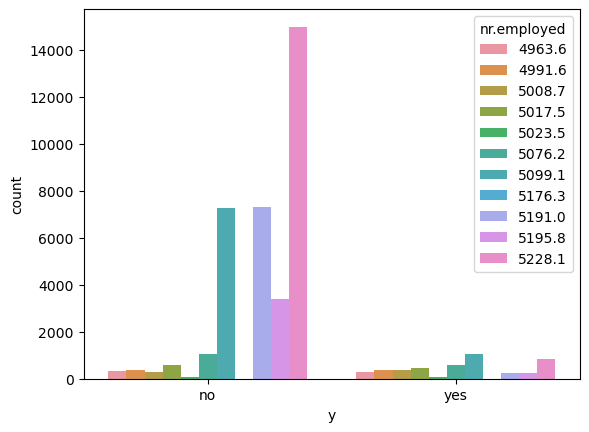

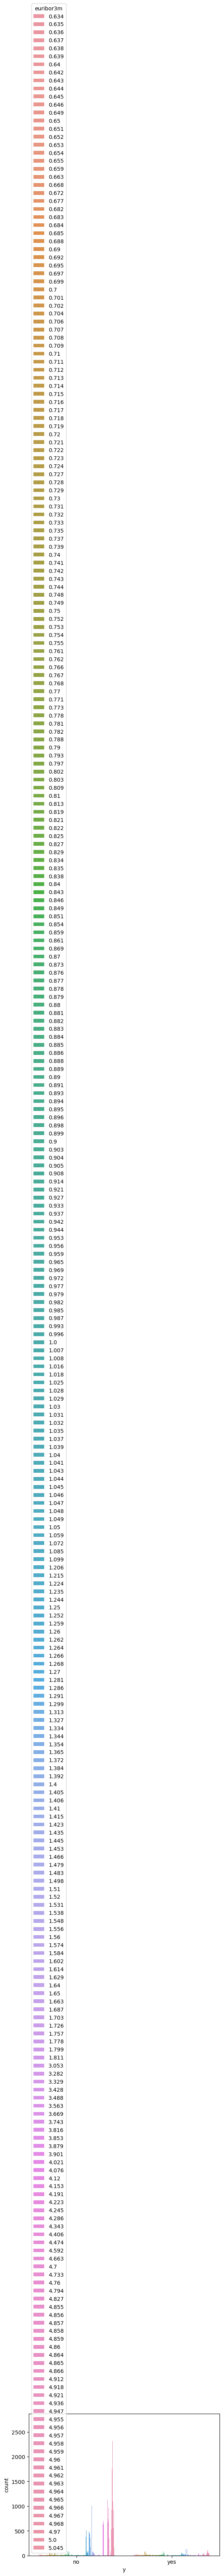

In [1390]:
sns.countplot(x = 'y',hue = 'emp.var.rate',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'nr.employed',data = bank_data)
plt.show()

sns.countplot(x = 'y',hue = 'euribor3m',data = bank_data)
plt.show()



### Initial observations of those who subscribed:

* Most subscribers were contacted via cell phone
* Most do not have a personal loan or credit in default
* Top job: admin
* Most are between the ages of 20 and 40
* Majority were married
* Top subscribing education level was university degree holders
* Most clients were subscribed within first five campaign touches
* Day of week and month clients were contacted do not seem like significant factors


In [1391]:
cat_dummy = ['job', 'education', 'marital']
dummies = pd.get_dummies(bank_data, prefix = cat_dummy, columns = cat_dummy)
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [1392]:
bank_data = dummies.drop(columns=dummies.columns[:1], axis=1)
print(bank_data.columns)


Index(['default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_basic', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown'],
      dtype='object')


*I will now run a correlation heat map to get a better understanding of which variables are correlated.*

In [1393]:
corr_matrix = bank_data.corr()
print(corr_matrix)

                               duration  campaign     pdays  previous  \
duration                       1.000000 -0.071529 -0.047542  0.019350   
campaign                      -0.071529  1.000000  0.052473 -0.079628   
pdays                         -0.047542  0.052473  1.000000 -0.587121   
previous                       0.019350 -0.079628 -0.587121  1.000000   
emp.var.rate                  -0.026798  0.151614  0.271619 -0.420462   
cons.price.idx                 0.006334  0.128916  0.079961 -0.204225   
cons.conf.idx                 -0.008611 -0.014263 -0.092279 -0.050536   
euribor3m                     -0.031263  0.135944  0.297075 -0.453797   
nr.employed                   -0.042930  0.144983  0.372283 -0.499886   
job_admin.                    -0.009072  0.011362 -0.024076  0.018027   
job_blue-collar                0.013964 -0.000691  0.064954 -0.053267   
job_entrepreneur               0.004563 -0.004034  0.018840 -0.012888   
job_housemaid                 -0.005885  0.002404 -

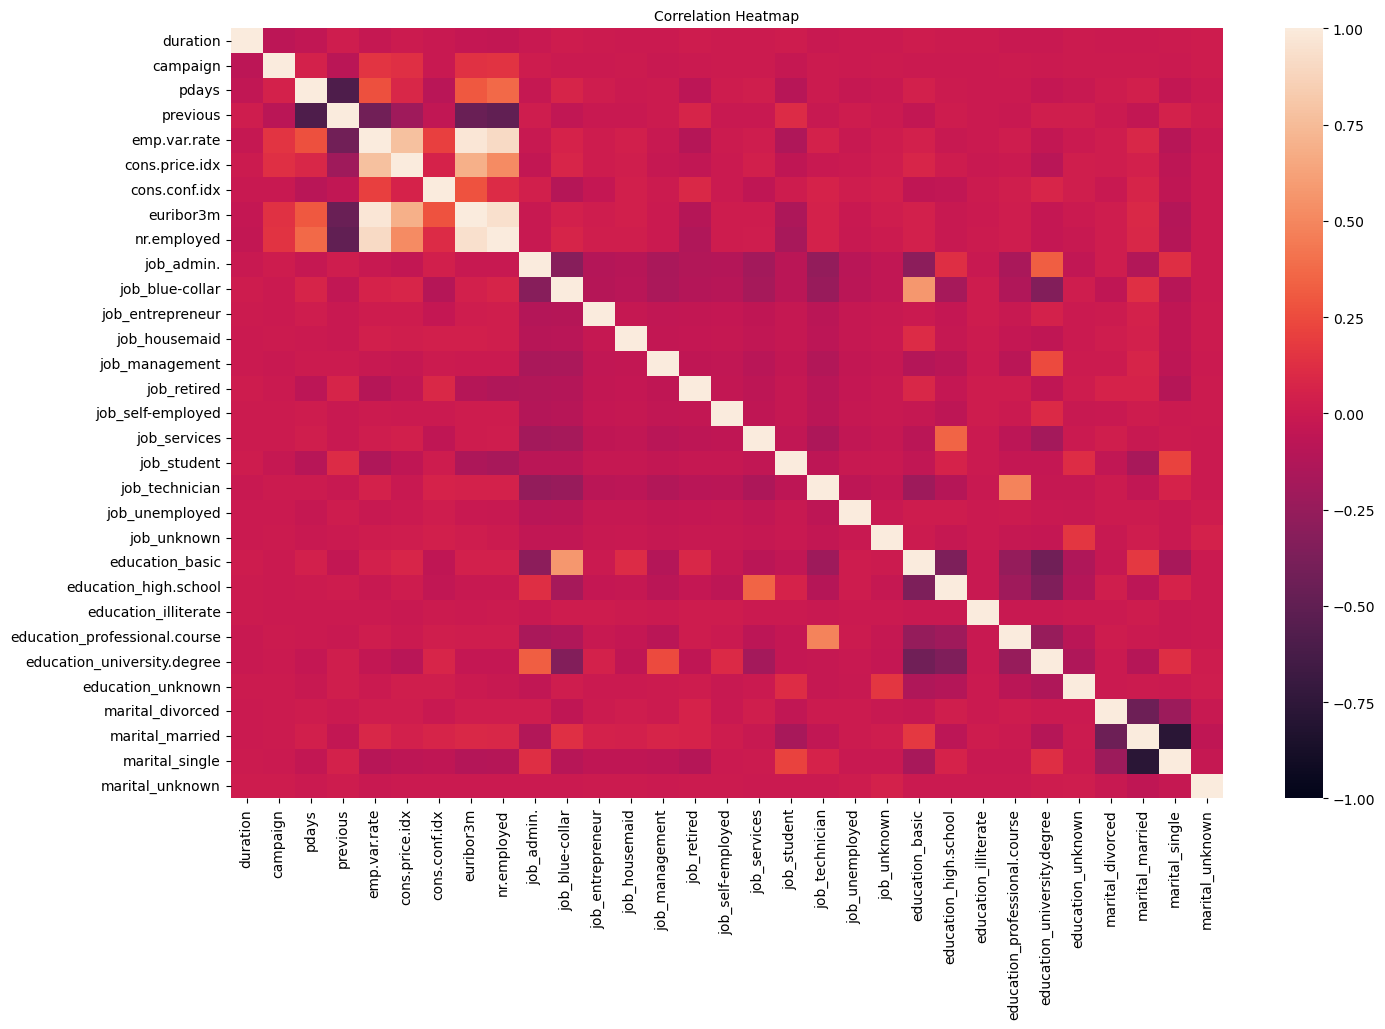

In [1394]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=False, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 10)
plt.show()

As we can see in the correlation heatmap, there are pockets of lighter shades which show correlation, and darker shades show highly uncorrelated. We ignore the white in the diagonal because they are the same variables (i.e. square 1 is duration on the x-axis and duration on the y-axis). Based on this graph, emp.var.rate, nr.employed and euribor3m are highly correllated. 

## Model that will predict the outcome variable. # 


As mentioned above, emp.var.rate, nr.employed and euribor3m are highly correlated and I will use them to predict whether a client subscribes to a term deposit or not. 

Reasoning:

- emp.var.rate: A drastic change in employment can be an indicator of economic issues such as a recession. People in general are less likely to spend money during economic downturns, therefore they'd be less likely to subscribe to a term deposit. 
- nr.employed: This is the number of employees that a bank has. More employees working could positively affect subscription rates due to better customer service. 
- euribor3m: According to Global-Rates.com, this is the interest rate at which banks lend each other funds, and can affect the interest rates on loans, mortgages, and savings accounts. It would make sense that when this rate is higher, clients are more likely to subscribe to a deposit. 

To test my model, I will run a logistic regression. 

# Logistic Regression 

In [1395]:
bank_data.dtypes

default                           object
housing                           object
loan                              object
contact                           object
month                             object
day_of_week                       object
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
poutcome                          object
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services    

In [1396]:
#Find all the columns containing categorical data

cat_columns = bank_data.select_dtypes(['object', 'category', 'float64']).columns

#Convert columns with categorical data to numeric via factorization. This prevents overfitting and errors with logistic regression

bank_data[cat_columns] = bank_data[cat_columns].apply(lambda x: pd.factorize(x)[0])
print(bank_data.head())


   default  housing  loan  contact  month  day_of_week  duration  campaign  \
0        0        0     0        0      0            0       261         1   
1        1        0     0        0      0            0       149         1   
2        0        1     0        0      0            0       226         1   
3        0        0     0        0      0            0       151         1   
4        0        0     1        0      0            0       307         1   

   pdays  previous  ...  education_basic  education_high.school  \
0    999         0  ...                1                      0   
1    999         0  ...                0                      1   
2    999         0  ...                0                      1   
3    999         0  ...                1                      0   
4    999         0  ...                0                      1   

   education_illiterate  education_professional.course  \
0                     0                              0   
1           

In [1397]:
bank_data.dtypes

default                          int64
housing                          int64
loan                             int64
contact                          int64
month                            int64
day_of_week                      int64
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
poutcome                         int64
emp.var.rate                     int64
cons.price.idx                   int64
cons.conf.idx                    int64
euribor3m                        int64
nr.employed                      int64
y                                int64
job_admin.                       uint8
job_blue-collar                  uint8
job_entrepreneur                 uint8
job_housemaid                    uint8
job_management                   uint8
job_retired                      uint8
job_self-employed                uint8
job_services                     uint8
job_student              

In [1398]:
#Split Data into features and target variables

from sklearn.model_selection import train_test_split

feature_cols = ['euribor3m', 'emp.var.rate', 'nr.employed']
X = bank_data[feature_cols]
y = bank_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) # 70% training and 30% test

In [1399]:
#Next I will conduct Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)

#Fit the model to the data
logreg.fit(X_train, y_train)

#Predict the values
y_pred = logreg.predict(X_test)

print('Accuracy of Logistic Regression on Test Data: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression on Test Data: 0.89


In [1400]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10410,   262],
       [ 1096,   287]])

Text(0.5, 427.9555555555555, 'Predicted')

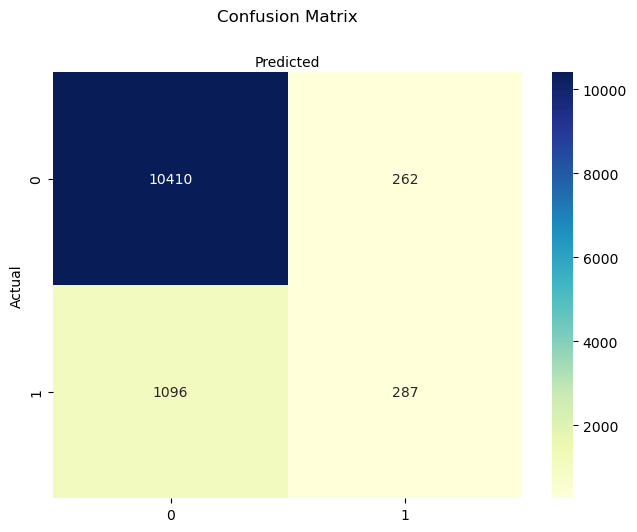

In [1401]:
#Visualizing the confusion matrix using a HeatMap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create a heatmap of the results
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1402]:
from sklearn.metrics import classification_report
target_names = ['Did Not Subscribe', 'Subscribed']
print(classification_report(y_test, y_pred, target_names=target_names))



                   precision    recall  f1-score   support

Did Not Subscribe       0.90      0.98      0.94     10672
       Subscribed       0.52      0.21      0.30      1383

         accuracy                           0.89     12055
        macro avg       0.71      0.59      0.62     12055
     weighted avg       0.86      0.89      0.87     12055



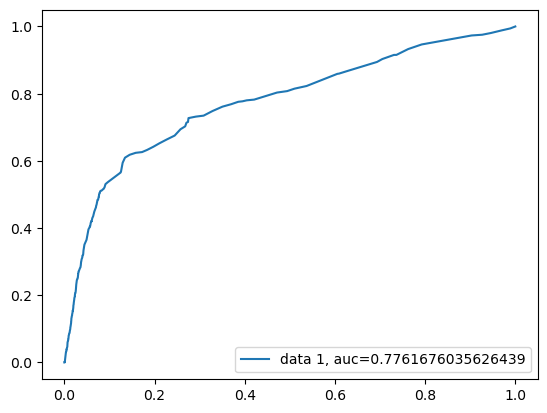

In [1403]:
#Receiver Operating Characteristic (ROC) curve to check for a true positive rate versus false positive rate

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Describe analysis and results of logistic regression:**
As you can see in the heatmap, 10,410 and 287 are actual predictions, and 1,096 and 262 are incorrect predictions with an accuracy of 89%, which is excellent.

ROC Score: An AUC score of 1 is a perfect classifier, and 0.5 is the worst classifier. A score of 0.77 is good. 

# **Executive Summary**

**Overview**

The bank conducted a telemarketing campaign between 2008 - 2010 and provided the results of whether a client subscribed to a term deposit (outcome variable). After analyzing the client demographics, I have provided my recommendation for a more strategic and cost-effective marketing campaign.

**Business-Related Question (Problem Statement)**

The Portuguese Banking Institution needs to focus their marketing efforts on clients who are more likely to purchase a term deposit. Which demographics are most likely to sign up for a term deposit out of the bank's existing customers?

**Data and Analysis**

I began exploring the data by checking for errors, unknowns (null values) and plotting the different variables into charts to help me visualize trends. From there, I created a correlation heat map to determine which variables were correlated, ultimately selecting emp.var.rate, nr.employed, and euribor3m to predict who will most likely subscribe. I then tested the model using logistic regression to check my accuracy.

**Proposed Solution**

I recommend that the bank run marketing campaigns when interest rates are high (euribor3m), when the economy is stable (low employment variation), and keep staffing levels up to ensure excellent customer service. These conditions are ideal per my model for determining when clients are most likely to subscribe, and can predict subscribership 89% of the time.
